This project is for learning purpose.

Source: [Handwritten Digit Recognition on MNIST dataset | Machine Learning Tutorials Using Python In Hindi](https://www.youtube.com/watch?v=bK_DBPcn3JQ&list=PLu0W_9lII9ai6fAMHp-acBmJONT7Y4BSG&index=21) by CodeWithHarry

##Fetching Datasets

In [3]:
pip install -U scikit-learn

In [5]:
from sklearn.datasets import fetch_openml

In [35]:
mnist = fetch_openml("mnist_784")

In [36]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [37]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [38]:
x, y = mnist["data"], mnist["target"]

In [39]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [41]:
%matplotlib inline

In [42]:
import matplotlib
import matplotlib.pyplot as plt

In [44]:
print(type(x))  # Output: <class 'numpy.ndarray'>
print(x.shape)  # Output: (70000, 784)

<class 'pandas.core.frame.DataFrame'>
(70000, 784)


In [45]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(70000, 784)


In [46]:
x = x.to_numpy()

In [47]:
y = y.to_numpy()

In [48]:
print(type(x), type(y))
print(x.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(70000, 784) (70000,)


In [173]:
some_digit = x[401]
some_digit_image = some_digit.reshape(28, 28)

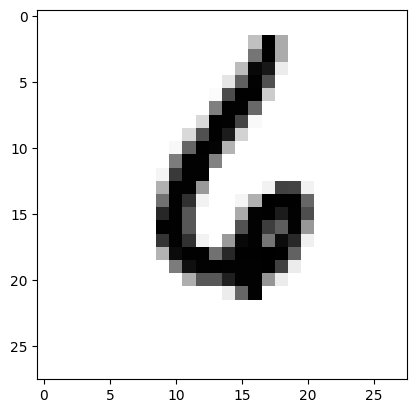

In [174]:
plt.imshow(some_digit_image, cmap="binary", interpolation="nearest");

In [175]:
y[401]

'6'

In [176]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [177]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

##Creating a 2 detector

In [178]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [179]:
y_train_6

array([False, False, False, ..., False, False, False])

In [180]:
y_test_6

array([False, False, False, ..., False, False,  True])

In [181]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(tol=0.01)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(tol=0.01)

In [182]:
print(sgd_clf.predict([some_digit]))

[ True]


In [183]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

In [184]:
accuracies.mean()

0.9804166666666667

In [185]:
"{:.4f}".format(accuracies.mean())

'0.9804'

##Quiz
Create a classifier which will classify a digit always as "not 2"
90% --> not 2

##Just some randome 3 cells

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image

In [186]:
image_url = "https://g.foolcdn.com/editorial/images/448870/oil-barrels-gettyimages-510563992.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

In [187]:
image_np = np.array(image)

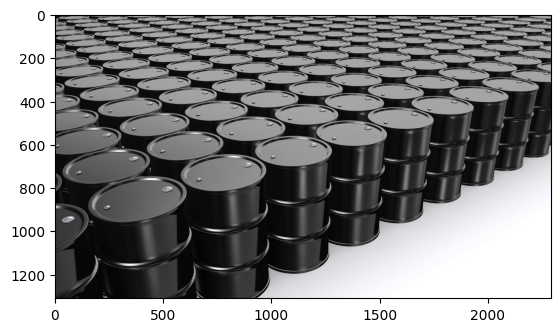

In [188]:
fig, ax = plt.subplots()
ax.imshow(image_np, aspect='equal')
plt.show()